In [47]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [48]:
# Define API URLs
api_base_url = "https://opendatakingston.cityofkingston.ca/api/records/1.0/search/?dataset="
stop_api = f"{api_base_url}transit-gtfs-stops&q=&rows=799"
driveway_api = f"{api_base_url}driveways&q=&rows=-1&facet=material"
route_api = f"{api_base_url}transit-gtfs-routes&q=&rows=-1&facet=route_short_name&exclude.route_long_name=999+Maintenance+-+Out+of+Service"

In [49]:
# Fetch data from APIs
stop_data = requests.get(stop_api).json()
driveway_data = requests.get(driveway_api).json()
route_data = requests.get(route_api).json()

In [50]:
# Normalize JSON data into DataFrames
stops_df = pd.json_normalize(stop_data, 'records')
driveways_df = pd.json_normalize(driveway_data, 'records')
routes_df = pd.json_normalize(route_data, 'records')

# Extract latitude and longitude for bus routes
latitudes, longitudes = [], []
for coord in routes_df['fields.shape.coordinates'][0][0]:
    latitudes.append(coord[1])
    longitudes.append(coord[0])

In [51]:
# Create DataFrame for route coordinates
route_coords_df = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes})

In [52]:
route_coords_df

,Latitude,Longitude
0,44.27897,-76.47257
1,44.27871,-76.47265
2,44.27855,-76.47309
3,44.27862,-76.47343
4,44.27759,-76.47388
...,...,...
63,44.22273,-76.49270
64,44.22299,-76.49363
65,44.22298,-76.49501
66,44.22431,-76.49502


In [53]:
# Load additional data from an Excel file
transit_data = pd.read_excel('Transit Data - October.xlsx')

In [54]:
# Calculate route usage counts
route_counts = transit_data['Route'].value_counts()

In [57]:
# Visualize route counts
route_counts_df = pd.DataFrame(route_counts).style.background_gradient(cmap='viridis')\
                                            .set_properties(**{'font-size': '10px'})
                                            

In [58]:
route_counts_df

,Route
701,96384
2,93880
501,78520
1,71450
502,71229
3,40953
601,38617
4,31207
7,24508
15,24001


In [42]:
# Load geospatial data


landuse_map = gpd.read_file('landuse.shp')
bus_routes_map = gpd.read_file('transit-gtfs-routes.geojson')
civic_addresses_map = gpd.read_file('civic-addresses.geojson')
bus_stops_map = gpd.read_file('transit-gtfs-stops.geojson')

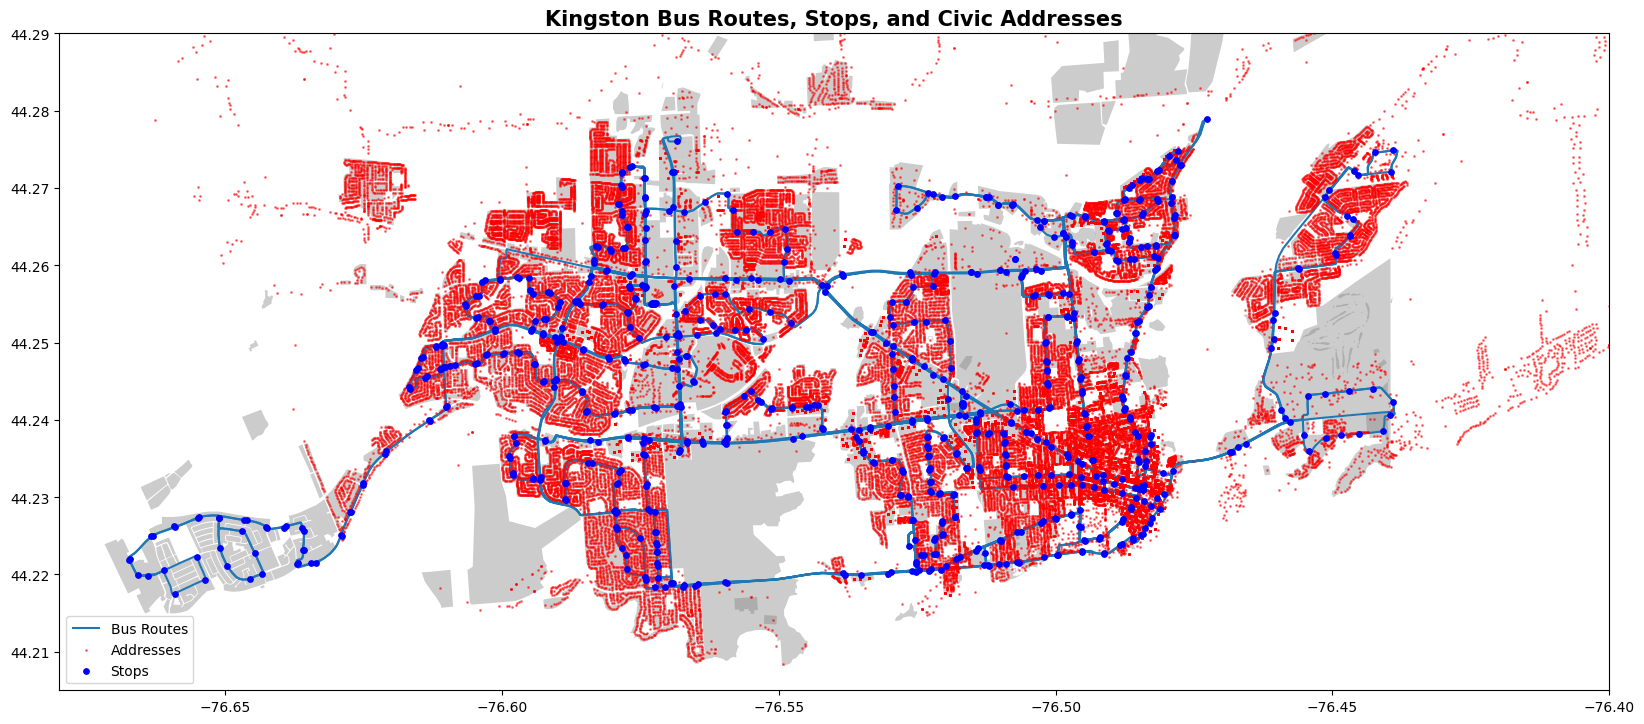

In [59]:
# Plotting
fig, ax = plt.subplots(figsize=(20, 20))
landuse_map.plot(ax=ax, alpha=0.4, color="grey", zorder=0)
bus_routes_map.plot(ax=ax, alpha=1, zorder=1, label='Bus Routes')
civic_addresses_map.plot(ax=ax, alpha=0.5, markersize=1, color="red", zorder=1, label="Addresses")
bus_stops_map.plot(ax=ax, alpha=1, markersize=15, color='blue', zorder=2, label='Stops')
# Set map limits
plt.xlim(-76.68, -76.40)
plt.ylim(44.205, 44.29)

# Final touches
plt.title("Kingston Bus Routes, Stops, and Civic Addresses", fontsize=15, fontweight="bold")
ax.legend()
plt.show()